In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

In [67]:
# Get the CSV data here and print head
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [68]:
data.shape

(1000, 40)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [70]:
data._c39

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: _c39, Length: 1000, dtype: float64

In [71]:
#sine the column has nan, we can remove it
data.drop('_c39',axis=1,inplace=True)

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


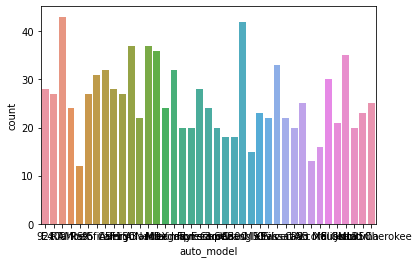

In [73]:
import seaborn as sns #checking for null
auto_model=sns.countplot(x="auto_model", data=data)
print(data["auto_model"].value_counts())

In [74]:
#finding unique values in object data types
def explore_object_type(data,feature_name):
    if data[feature_name].dtype == 'object':
        print(data[feature_name].value_counts())

In [75]:
for featureName in data:
    if data[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(data, str(featureName))


"policy_bind_date's" Values with count are :
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

"policy_state's" Values with count are :
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

"policy_csl's" Values with count are :
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

"insured_sex's" Values with count are :
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

"insured_education_level's" Values with count are :
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

"insured_occupation's" Values with count are :
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft

In [76]:
# as we can see, there are '?' for features columns: property_damage's, police_report_available's, collision_type's

In [77]:
data= data.replace('?', np.NaN)
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


NO     343
YES    314
Name: police_report_available, dtype: int64


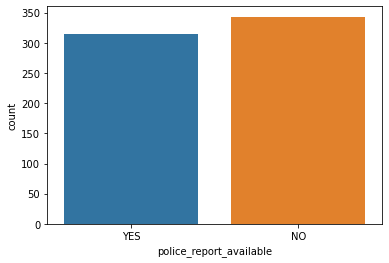

In [78]:
#lets check if all '?' are replaced with nan
import seaborn as sns #checking for null
police_report_available=sns.countplot(x="police_report_available", data=data)
print(data["police_report_available"].value_counts())
#AS U CAN SEE there is '?' in the data. We have to remove this

In [79]:
#using mode to fill these columns and replace nan

data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


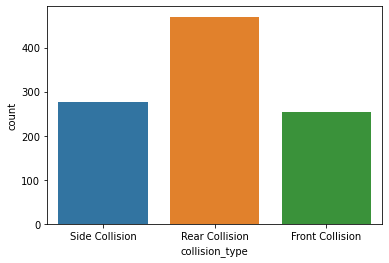

In [80]:
#lets check if mode values are replacing nan
import seaborn as sns #checking for null
collision_type=sns.countplot(x="collision_type", data=data)
print(data["collision_type"].value_counts())


NO     686
YES    314
Name: police_report_available, dtype: int64


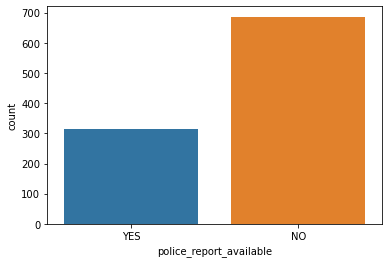

In [81]:
#lets check if all '?' are replaced with nan
import seaborn as sns #checking for null
police_report_available=sns.countplot(x="police_report_available", data=data)
print(data["police_report_available"].value_counts())
#AS U CAN SEE there is '?' in the data. We have to remove this

In [82]:
def explore_object_type(data,feature_name):
    if data[feature_name].dtype == 'int64':
        print(data[feature_name].value_counts())

In [83]:
for featureName in data:
    if data[featureName].dtype == 'int64':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(data, str(featureName))


"months_as_customer's" Values with count are :
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64

"age's" Values with count are :
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

"policy_number's" Values with count are :
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64

"policy_deductable's" Values with count are :
1000    351
500     342
2000    307
Name: policy_deductable,

In [84]:
#The column umbrella_limit's, capital-gains's, capital-loss's,property_claim's, injury_claim's  is filled with zeros

In [85]:
def explore_object_type(data,feature_name):
    if data[feature_name].dtype == 'float64':
        print(data[feature_name].value_counts())

In [86]:
for featureName in data:
    if data[featureName].dtype == 'float64':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(data, str(featureName))


"policy_annual_premium's" Values with count are :
1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64


In [87]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
15,incident_location,1000
0,policy_bind_date,951
8,incident_date,60
19,auto_model,39
6,insured_hobbies,20
18,auto_make,14
5,insured_occupation,14
14,incident_city,7
4,insured_education_level,7
13,incident_state,7


In [88]:
#Dropping incident_location and policy_bind_date

data.drop('incident_location',axis=1,inplace=True)
data.drop('policy_bind_date',axis=1,inplace=True)

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


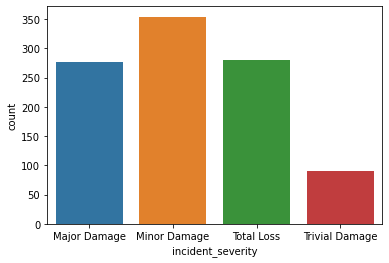

In [89]:
#checking the amount of incident_severity
import seaborn as sns  
incident_severity=sns.countplot(x="incident_severity", data=data)
print(data["incident_severity"].value_counts())

<AxesSubplot:xlabel='count', ylabel='insured_hobbies'>

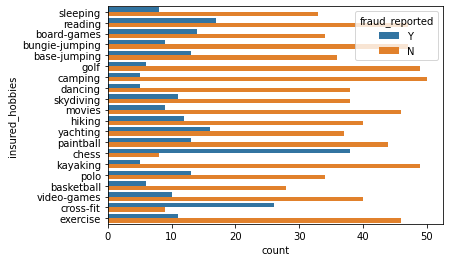

In [90]:
#insured hobbies and fraud
sns.countplot(y='insured_hobbies', hue='fraud_reported', data=data)
#most chess layers reported for fraud

<AxesSubplot:xlabel='count', ylabel='incident_city'>

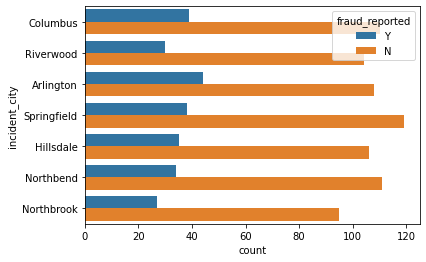

In [91]:
#auto make and fraud
sns.countplot(y='incident_city', hue='fraud_reported', data=data)
#northbrook city had least amount of incidents
#most fraud reports were from Airlington
#least fraud reported was from Northbrook

<AxesSubplot:xlabel='count', ylabel='incident_city'>

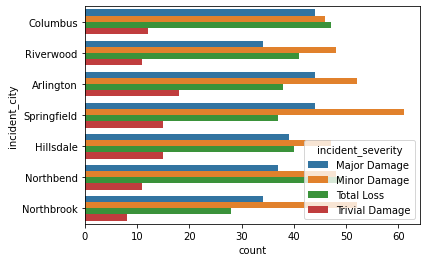

In [92]:
#automake and incidents
sns.countplot(y='incident_city', hue='incident_severity', data=data)
#northbrook city had least amount of incidents
#the most minor damage was from Sprngfield
#maximum total loss was from columbus and Northbend. northbrook had the least trivial loss
#Springfiled reported the most monior damage cases

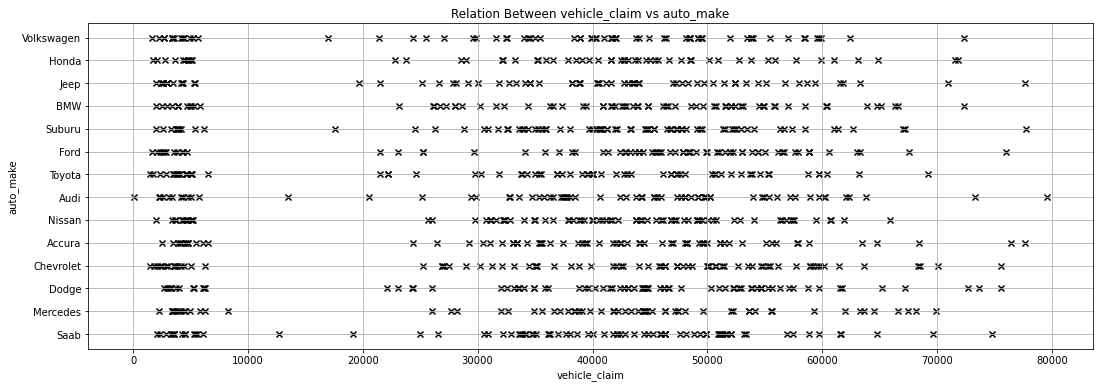

In [93]:
#automake and vehicle claims

plt.figure(figsize=(18, 6))
plt.title("Relation Between vehicle_claim vs auto_make")
plt.grid()
plt.scatter(data['vehicle_claim'] , data['auto_make'], c='k', marker='x')
plt.xlabel("vehicle_claim")
plt.ylabel("auto_make")
plt.show()
#Audi has the highest claims
#Nissan has shown least claims

<AxesSubplot:xlabel='count', ylabel='auto_make'>

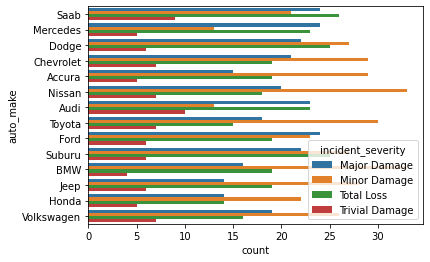

In [94]:
#automake and incident_severity
sns.countplot(y='auto_make', hue='incident_severity', data=data)
#the most tota loss was reproted from Saab and ,least from Honda
#most ,major damage was reported from Saab
#most ,minor damage was reported from Nissan
#most trivial damage was from Audi and Saab

<AxesSubplot:xlabel='count', ylabel='number_of_vehicles_involved'>

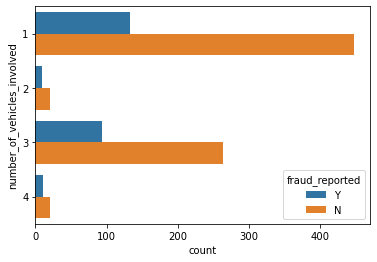

In [95]:
#number_of_vehicles_involved and fraud reported
sns.countplot(y='number_of_vehicles_involved', hue='fraud_reported', data=data)
#The most fraud reported was from one vehicle

<AxesSubplot:xlabel='count', ylabel='number_of_vehicles_involved'>

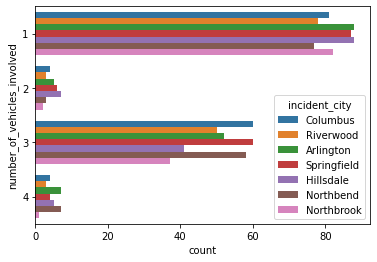

In [96]:

#number_of_vehicles_involved and incident_city
sns.countplot(y='number_of_vehicles_involved', hue='incident_city', data=data)
#Airlington and Hillsdale had maximum no of 1 vehicle involved
#Hillsdale had maximum no of 2 vehicle involved
#Columbus and Springfiled had maximum no of 3 vehicle involved
#Northblend & Arlington had maximum no of 4 vehicle involved
#As we can see Airlington and Hillsdale are the cities with max car involvement

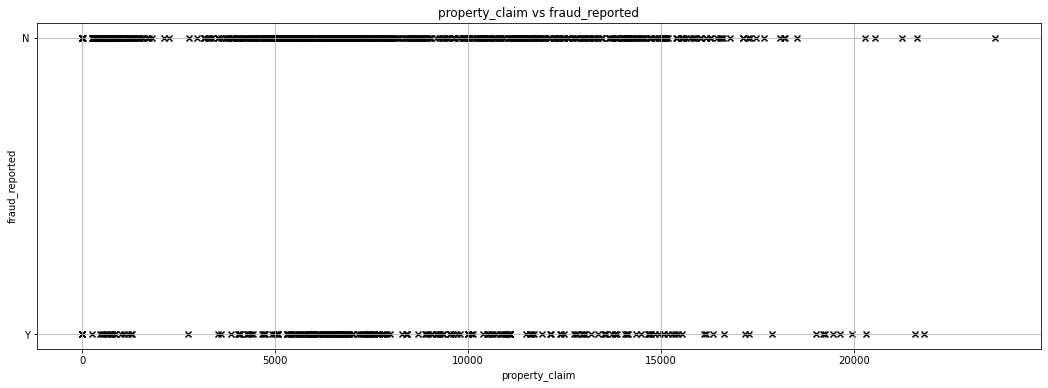

In [97]:
#property_claim and fraud reported
plt.figure(figsize=(18, 6))
plt.title("property_claim vs fraud_reported")
plt.grid()
plt.scatter(data['property_claim'] , data['fraud_reported'], c='k', marker='x')
plt.xlabel("property_claim")
plt.ylabel("fraud_reported")
plt.show()

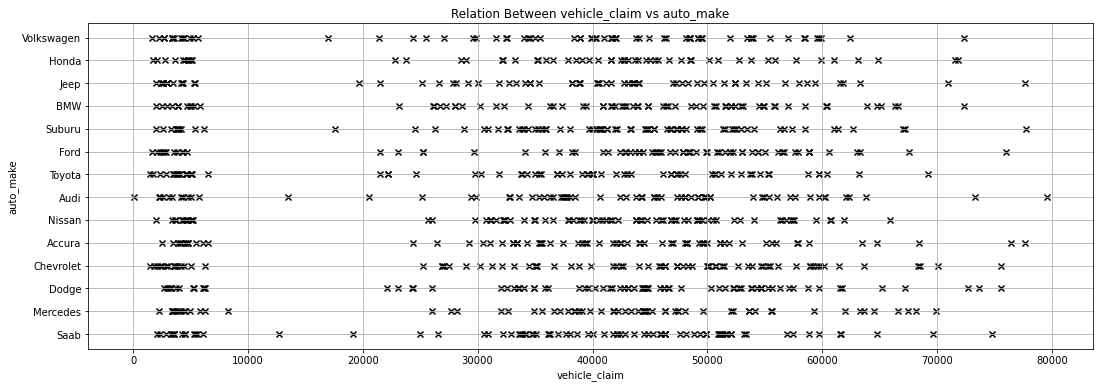

In [98]:
#Relation Between vehicle_claim vs auto_make
plt.figure(figsize=(18, 6))
plt.title("Relation Between vehicle_claim vs auto_make")
plt.grid()
plt.scatter(data['vehicle_claim'], data['auto_make'], c='k', marker='x')
plt.xlabel("vehicle_claim")
plt.ylabel("auto_make")
plt.show()
#Audi has the highest claims
#Nissan has shown least claims

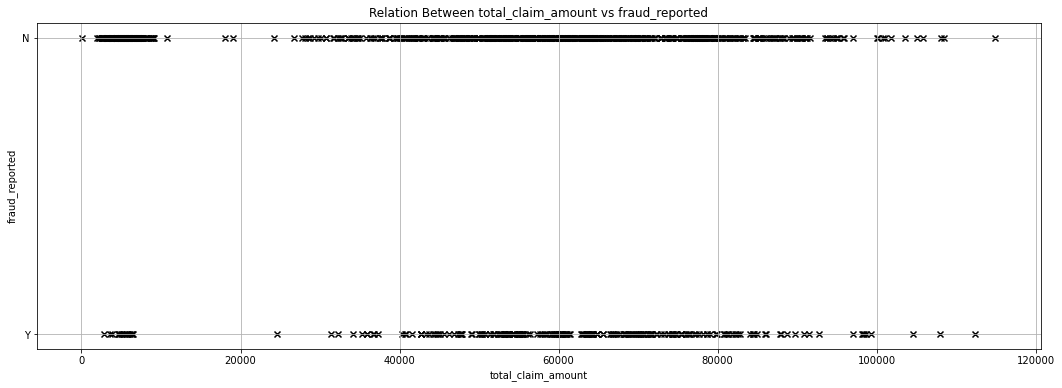

In [99]:
#Relation Between total_claim_amount vs fraud_reported
plt.figure(figsize=(18, 6))
plt.title("Relation Between total_claim_amount vs fraud_reported")
plt.grid()
plt.scatter(data['total_claim_amount'], data['fraud_reported'], c='k', marker='x')
plt.xlabel("total_claim_amount")
plt.ylabel("fraud_reported")
plt.show()

<AxesSubplot:xlabel='count', ylabel='collision_type'>

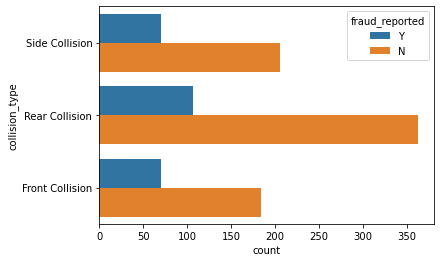

In [100]:
#collision_type and fraud
sns.countplot(y='collision_type', hue='fraud_reported', data=data)
#Rear collision is the most reported fraud

<AxesSubplot:xlabel='count', ylabel='collision_type'>

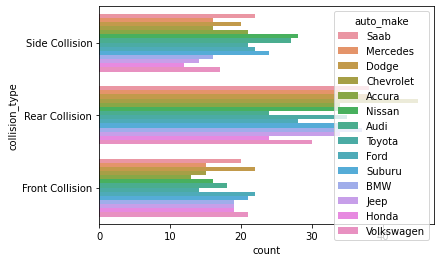

In [101]:
#collision_type and automake
sns.countplot(y='collision_type', hue='auto_make', data=data)
#Nissan has the ost rear collision and side collision
#Didge and ford has the most front collison

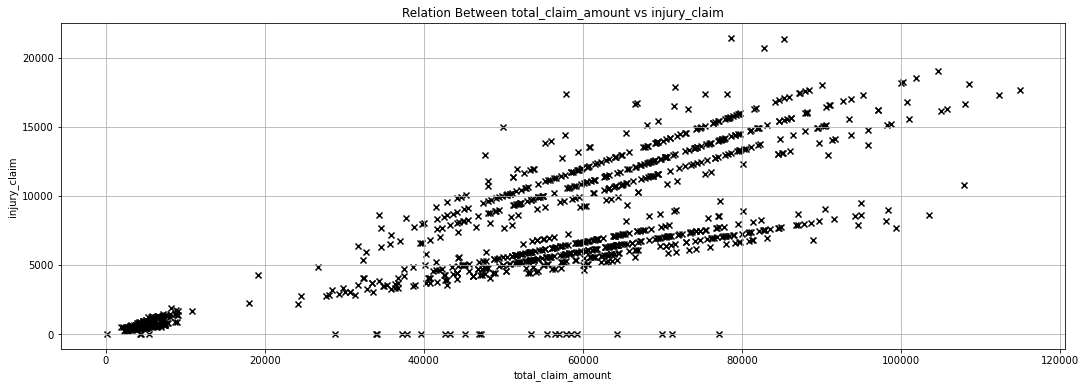

In [102]:
#Relation Between total_claim_amount vs injury_claim
plt.figure(figsize=(18, 6))
plt.title("Relation Between total_claim_amount vs injury_claim")
plt.grid()
plt.scatter(data['total_claim_amount'], data['injury_claim'], c='k', marker='x')
plt.xlabel("total_claim_amount")
plt.ylabel("injury_claim")
plt.show()
#most total claims for injury  are in the 40000-60000 and 60000-80000 bracket

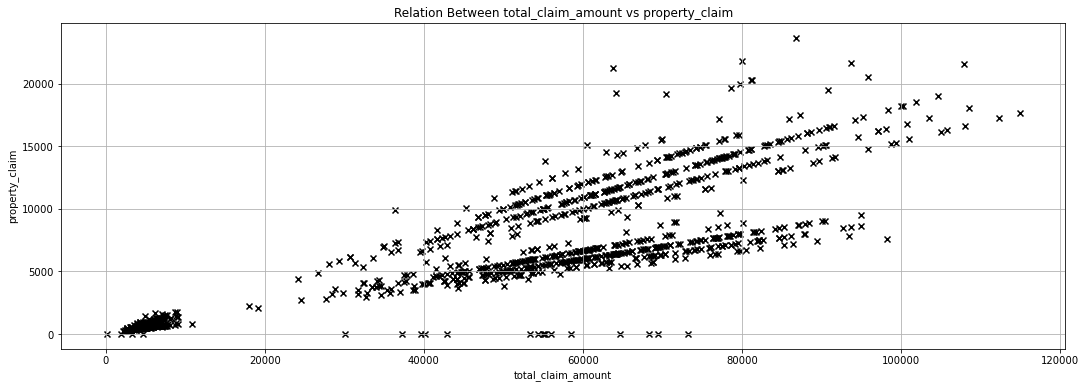

In [103]:
#Relation Between total_claim_amount vs property_claim
plt.figure(figsize=(18, 6))
plt.title("Relation Between total_claim_amount vs property_claim")
plt.grid()
plt.scatter(data['total_claim_amount'], data['property_claim'], c='k', marker='x')
plt.xlabel("total_claim_amount")
plt.ylabel("property_claim")
plt.show()
#most total cliams for property fall under the 60000-80000 bracket

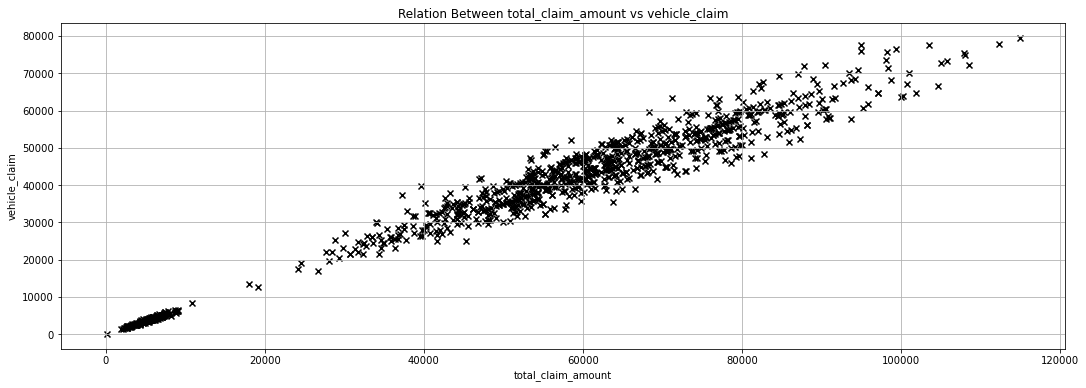

In [105]:
#Relation Between total_claim_amount vs vehicle_claim
plt.figure(figsize=(18, 6))
plt.title("Relation Between total_claim_amount vs vehicle_claim")
plt.grid()
plt.scatter(data['total_claim_amount'], data['vehicle_claim'], c='k', marker='x')
plt.xlabel("total_claim_amount")
plt.ylabel("vehicle_claim")
plt.show()

<AxesSubplot:>

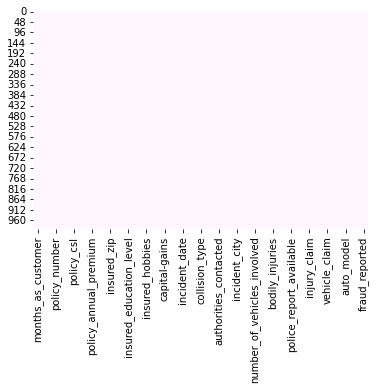

In [106]:
# Missing Data Pattern 
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='PuBu')

In [127]:
#checking missing values. there are no missing values
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(39)
#there are no issing values

,Total,Percent
months_as_customer,0,0.0
incident_severity,0,0.0
incident_state,0,0.0
incident_city,0,0.0
incident_hour_of_the_day,0,0.0
number_of_vehicles_involved,0,0.0
property_damage,0,0.0
bodily_injuries,0,0.0
witnesses,0,0.0
police_report_available,0,0.0


In [128]:
#label ensoding
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
    if data[col].dtypes == 'object':
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

In [129]:
data.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,0,6500,1300,650,4550,0,31,2009,0


In [130]:
#we have no nulls
def pplot(data,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=data,kde=True)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=data)
    plt.show()

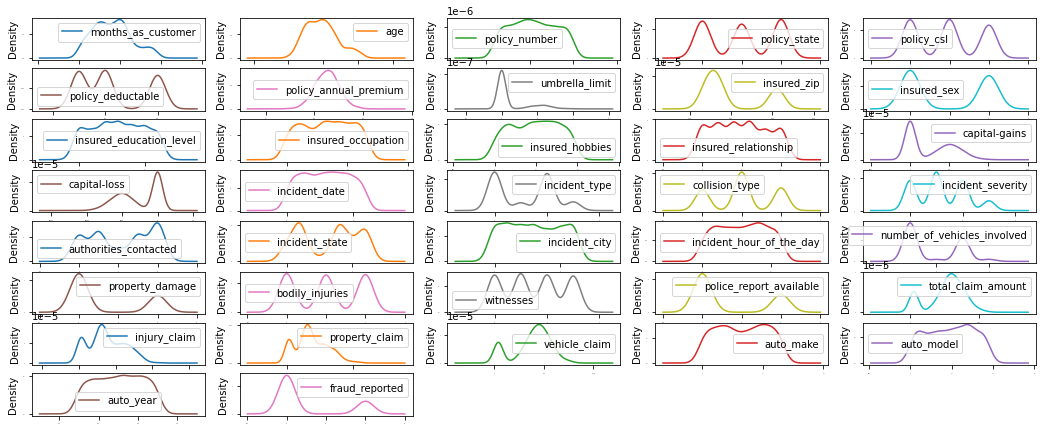

In [131]:
data.plot(kind='density', subplots=True, layout=(13, 5), sharex=False, legend=True, fontsize=1, figsize=(18,12))
plt.show()

<AxesSubplot:>

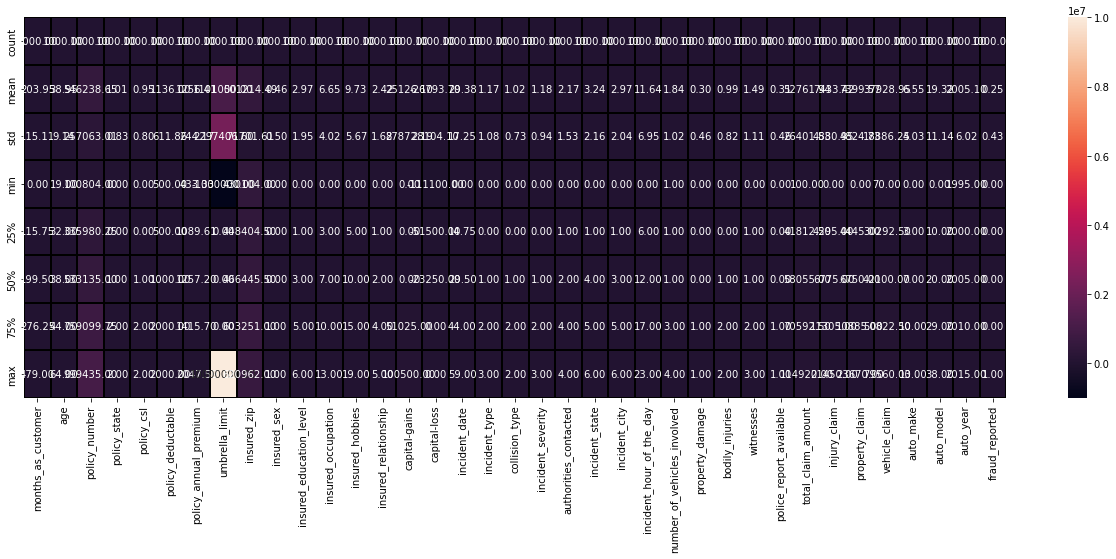

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<AxesSubplot:>

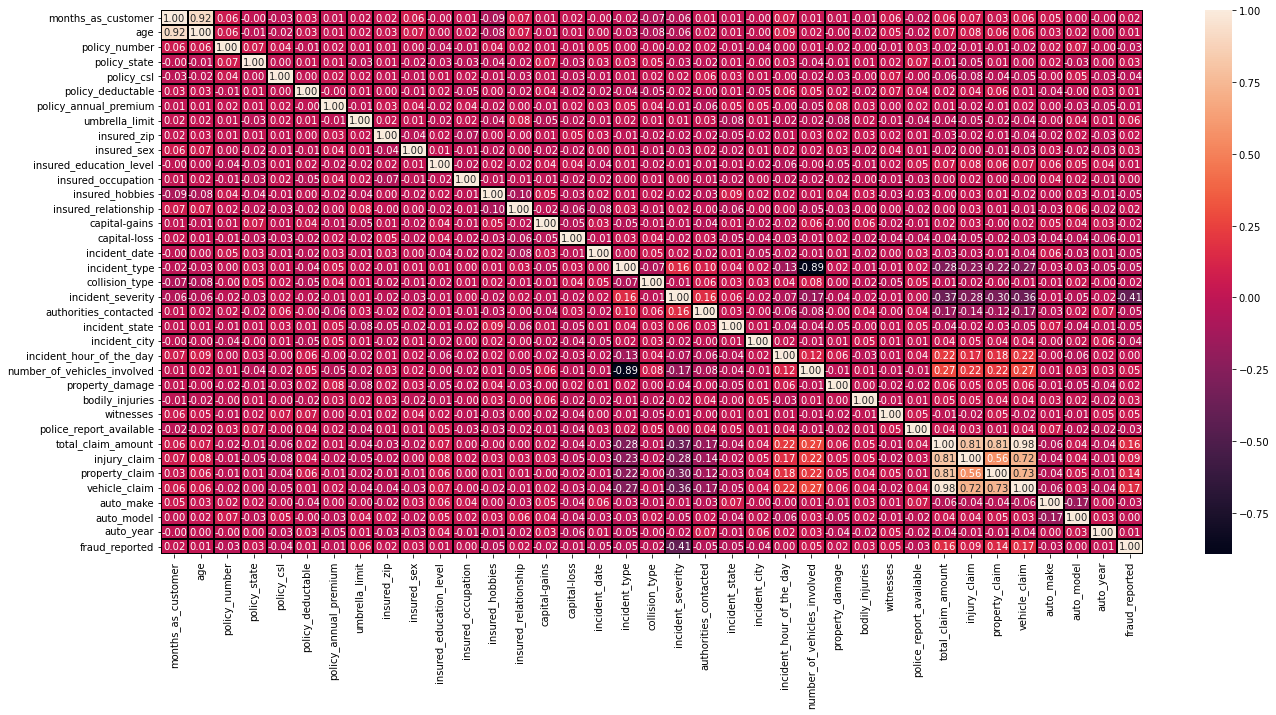

In [133]:
plt.figure(figsize=(22,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [134]:
#there is strong relation between vehicle_claim and property_claim
#there is strong relation between vehicle_claim and injury_claim 
#there is strong relation between age and months_as_customer

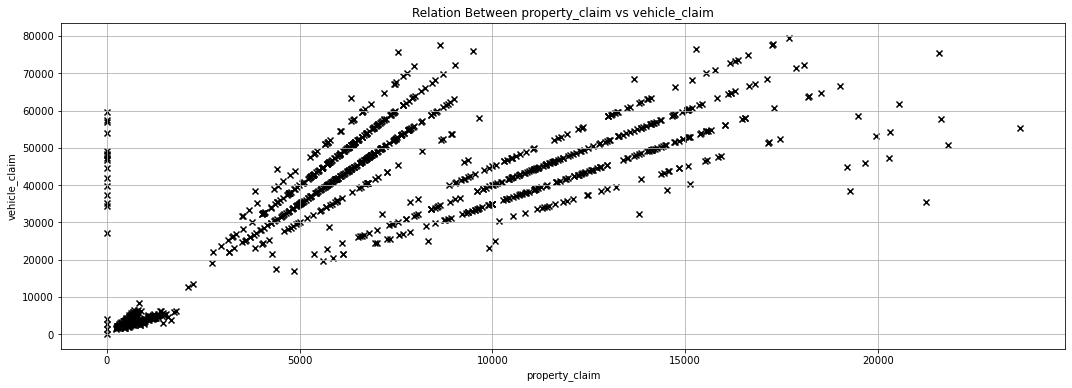

In [135]:
#Relation Between property_claim vs vehicle_claim
plt.figure(figsize=(18, 6))
plt.title("Relation Between property_claim vs vehicle_claim")
plt.grid()
plt.scatter(data['property_claim'], data['vehicle_claim'], c='k', marker='x')
plt.xlabel("property_claim")
plt.ylabel("vehicle_claim")
plt.show()
#most property cliams are in the 5000-10000 bracket

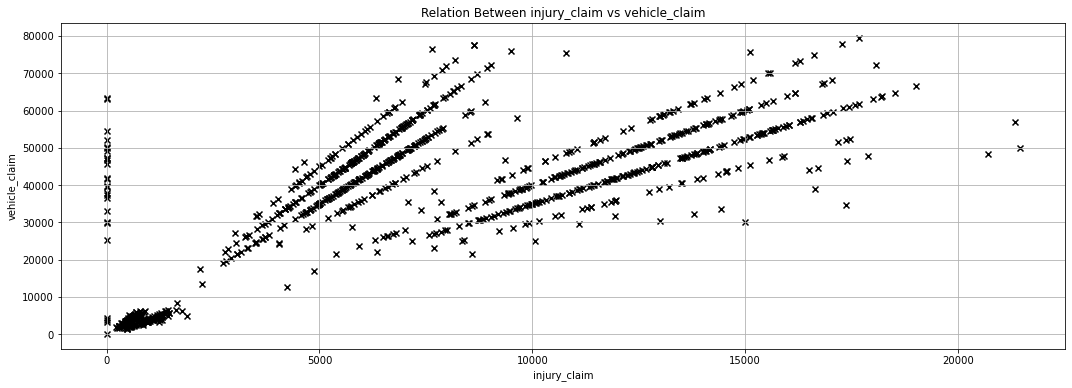

In [136]:
#Relation Between property_claim vs vehicle_claim
plt.figure(figsize=(18, 6))
plt.title("Relation Between injury_claim vs vehicle_claim")
plt.grid()
plt.scatter(data['injury_claim'], data['vehicle_claim'], c='k', marker='x')
plt.xlabel("injury_claim")
plt.ylabel("vehicle_claim")
plt.show()

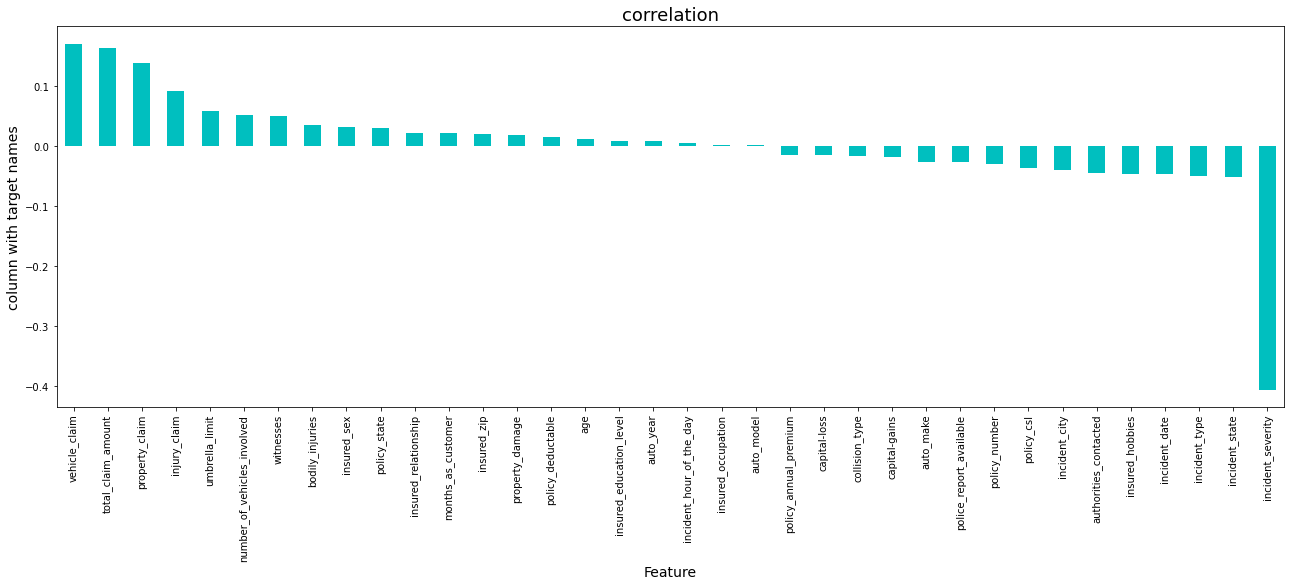

In [137]:
#CORELATION WITH fraud_reported
plt.figure(figsize=(22,7))
data.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

In [138]:
#there is a relation between fraud and vehicle claim
fraud and total claim amount
negative with incident severity

SyntaxError: invalid syntax (605197106.py, line 2)

In [ ]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between fraud_reported vs vehicle_claim")
plt.grid()
plt.scatter(data['vehicle_claim'], data['fraud_reported'], c='k', marker='x')
plt.xlabel("vehicle_claim")
plt.ylabel("fraud_reported")
plt.show()

In [ ]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between months_as_customer vs age")
plt.grid()
plt.scatter(data['months_as_customer'], data['age'], c='k', marker='x')
plt.xlabel("months_as_customer")
plt.ylabel("age")
plt.show()

In [ ]:
plt.figure(figsize=(18, 6))
plt.title("total_claim_amount  vs fraud_reported ")
plt.grid()
plt.scatter(data['total_claim_amount'], data['fraud_reported'], c='k', marker='x')
plt.xlabel("total_claim_amount")
plt.ylabel("fraud_reported ")
plt.show()

In [ ]:
data.info()

In [ ]:
data.skew().sort_values(ascending=False)

In [ ]:
#umbrella_limit  is skewed

In [144]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [145]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["fraud_reported"]]
# Store the variable we are predicting 
target = "fraud_reported"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1000, 36)
(1000,)


In [146]:
data.isnull().values.any()

False

Text(0, 0.5, 'Features')

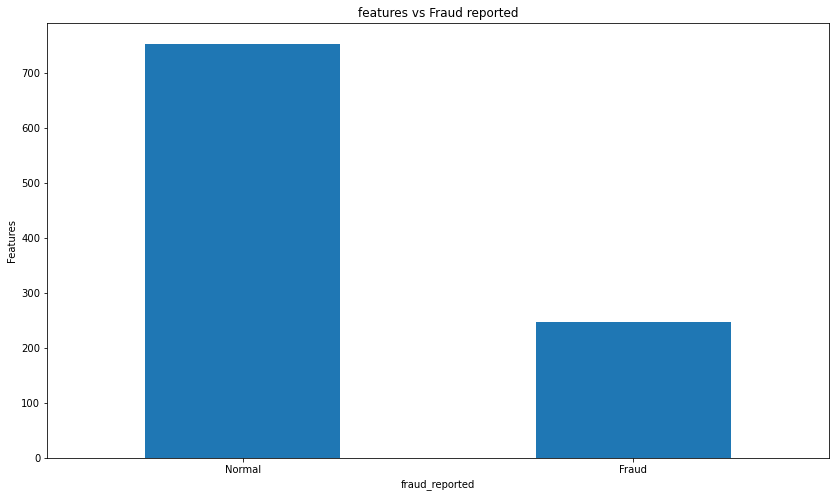

In [147]:
count_classes = pd.value_counts(data['fraud_reported'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("features vs Fraud reported")

plt.xticks(range(2), LABELS)

plt.xlabel("fraud_reported")

plt.ylabel("Features")

In [148]:
## Get the Fraud and the normal dataset 

fraud = data[data['fraud_reported']==1]

normal = data[data['fraud_reported']==0]

In [149]:
print(fraud.shape,normal.shape)


(247, 37) (753, 37)


In [150]:
#there is data imbalance

In [151]:
!pip install imblearn


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
x = data.drop(["fraud_reported"], axis=1)
y = data["fraud_reported"]

In [153]:
from sklearn.preprocessing import power_transform
X_new=power_transform(x)

In [154]:
X_new

array([[ 1.05127872,  1.00873272, -0.02315574, ...,  0.85911096,
        -1.80834465, -0.19745541],
       [ 0.30453584,  0.43143333, -0.74529151, ...,  0.41861586,
        -0.58622515,  0.30262249],
       [-0.51122603, -1.13951302,  0.58793118, ..., -0.55514878,
         0.94490524,  0.30262249],
       ...,
       [-0.54970642, -0.47044379,  1.37330822, ...,  1.07113608,
         0.04546316, -1.49627768],
       [ 1.9126537 ,  2.13055434,  0.02397688, ..., -1.44076333,
        -1.30534129, -1.17624558],
       [ 1.90009963,  1.98572613,  0.10769485, ...,  0.41861586,
        -0.58622515,  0.30262249]])

In [155]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X=sc.fit_transform(X_new)
Scaled_X

array([[ 1.05127872,  1.00873272, -0.02315574, ...,  0.85911096,
        -1.80834465, -0.19745541],
       [ 0.30453584,  0.43143333, -0.74529151, ...,  0.41861586,
        -0.58622515,  0.30262249],
       [-0.51122603, -1.13951302,  0.58793118, ..., -0.55514878,
         0.94490524,  0.30262249],
       ...,
       [-0.54970642, -0.47044379,  1.37330822, ...,  1.07113608,
         0.04546316, -1.49627768],
       [ 1.9126537 ,  2.13055434,  0.02397688, ..., -1.44076333,
        -1.30534129, -1.17624558],
       [ 1.90009963,  1.98572613,  0.10769485, ...,  0.41861586,
        -0.58622515,  0.30262249]])

In [156]:
#wewill be not using this method

In [157]:
pd.DataFrame(Scaled_X, columns=x.columns).skew().sort_values(ascending=False)

property_damage                0.863806
police_report_available        0.802728
insured_zip                    0.663347
number_of_vehicles_involved    0.363693
insured_sex                    0.148630
capital-loss                   0.090488
capital-gains                  0.038722
policy_deductable              0.023988
policy_annual_premium          0.004758
age                           -0.001945
auto_year                     -0.012491
incident_severity             -0.079282
incident_type                 -0.088766
policy_csl                    -0.100769
bodily_injuries               -0.128799
collision_type                -0.129334
months_as_customer            -0.135661
policy_state                  -0.145377
witnesses                     -0.153648
policy_number                 -0.160374
insured_relationship          -0.160421
incident_city                 -0.181772
insured_education_level       -0.188564
authorities_contacted         -0.227269
auto_make                     -0.227539


In [158]:
x.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year'],
      dtype='object')

In [159]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   int32  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

In [160]:
X=pd.DataFrame(Scaled_X, columns=x.columns)

In [161]:
X.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year'],
      dtype='object')

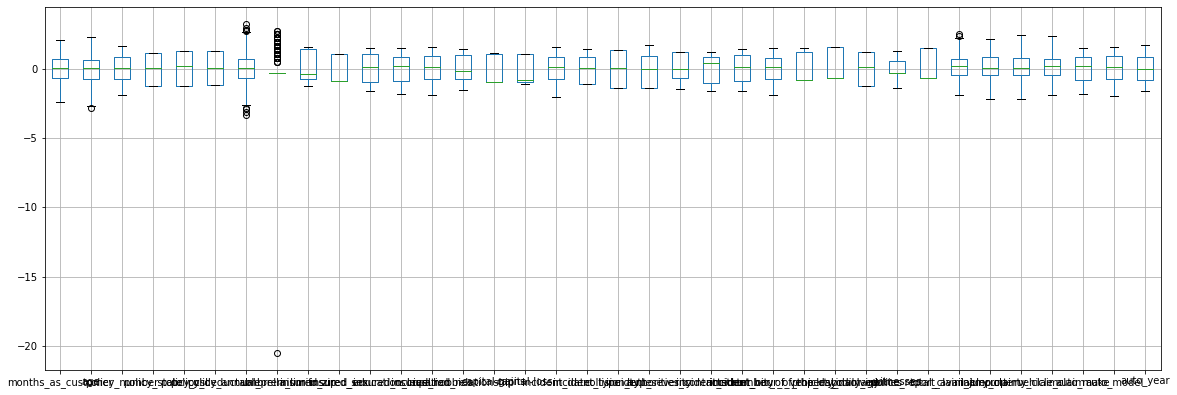

In [165]:
#Plotting boxplots for first 30 columns
X.iloc[:,0:36].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [162]:
!pip install collection


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [163]:
!pip install Counter


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [166]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
## RandomOverSampler to handle imbalanced data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [167]:
smote=SMOTE()
#fit predictor and target variable
x_smote, y_smote=smote.fit_resample(X,y)

In [168]:
print('original datashape', Counter(y))
print('original datashape', Counter(y_smote))

original datashape Counter({0: 753, 1: 247})
original datashape Counter({1: 753, 0: 753})


In [169]:
x_smote.shape

(1506, 36)

In [170]:
y_smote.shape

(1506,)

In [173]:
from sklearn.model_selection import train_test_split
LR=LogisticRegression()

In [174]:
#Splitting the dataframe:
for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=i,test_size=0.25)
    LR.fit(x_train, y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state state",i,"The model performs very well")
        print("At random_state state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random_state state 16 The model performs very well
At random_state state:- 16
Training accuracy_score is:- 80.4
Testing accuracy_score is:- 80.4 


At random_state state 254 The model performs very well
At random_state state:- 254
Training accuracy_score is:- 80.8
Testing accuracy_score is:- 80.8 


At random_state state 344 The model performs very well
At random_state state:- 344
Training accuracy_score is:- 80.0
Testing accuracy_score is:- 80.0 




In [175]:
x_train, x_test, y_train, y_test  = train_test_split(X,y, test_size=0.25, random_state=254)

In [176]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier 

In [177]:
lr.fit(x_train, y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
adb.fit(x_train,y_train)
svm.fit(x_train,y_train)
gdboost.fit(x_train,y_train)
print("Model is trained")

Model is trained


In [178]:
print("Lr classification score",lr.score(x_train,y_train))
print("knn classification score",knn.score(x_train,y_train))
print("dt classification score",dt.score(x_train,y_train))
print("rf classification score",rf.score(x_train,y_train))
print("adb classification score",adb.score(x_train,y_train))
print("svm classification score",svm.score(x_train,y_train))
print("gdboost classification score",gdboost.score(x_train,y_train))

Lr classification score 0.808
knn classification score 0.7826666666666666
dt classification score 1.0
rf classification score 0.9986666666666667
adb classification score 0.848
svm classification score 0.8946666666666667
gdboost classification score 0.9746666666666667


In [179]:
#classification report
lr_yprad = lr.predict(x_test)
knn_yprad = knn.predict(x_test)
dt_yprad = dt.predict(x_test)
rf_yprad = rf.predict(x_test)
adb_yprad = adb.predict(x_test)
svm_yprad = svm.predict(x_test)
gdboost_yprad = gdboost.predict(x_test)

In [180]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
#checking the roc_auc_score
print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dt.predict(x_test)))
print(roc_auc_score(y_test,rf.predict(x_test)))
print(roc_auc_score(y_test,adb.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))
print(roc_auc_score(y_test,gdboost.predict(x_test)))

0.699382292381606
0.5487302676733014
0.7264070006863418
0.661633493479753
0.6779341111873713
0.5834763212079616
0.8069663692518875


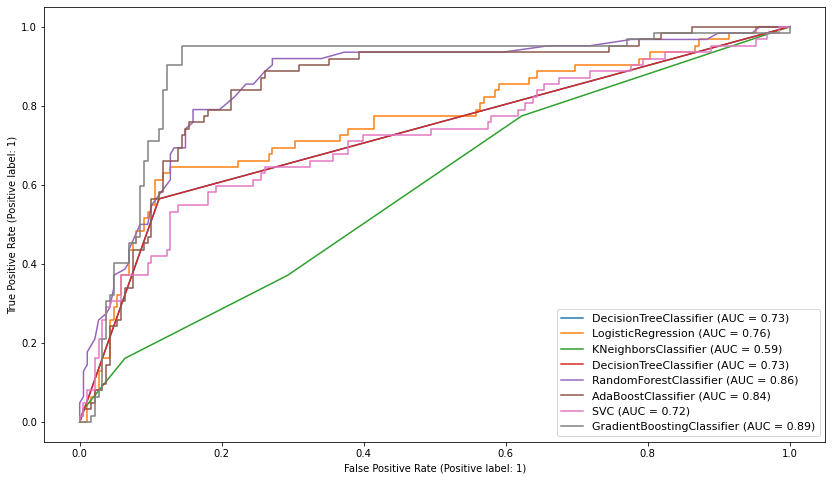

In [181]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,x_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

In [182]:
#Gradient boosting, Random forest and Ada Boost, we shall be implementing

In [183]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,gdboost_yprad))
pd.crosstab(y_test,gdboost_yprad)

0.856


col_0,0,1
fraud_reported,,
0,170,18
1,18,44


In [184]:
#using smote method

In [185]:
x_smote, x_test, y_smote, y_test  = train_test_split(X,y, test_size=0.25, random_state=254)

In [186]:
gdboost.fit(x_smote,y_smote)

GradientBoostingClassifier()

In [187]:
print("gdboost classification score",gdboost.score(x_smote,y_smote)) #the classification score has increased with smote

gdboost classification score 0.9746666666666667


In [188]:
print(accuracy_score(y_test,gdboost_yprad))
pd.crosstab(y_test,gdboost_yprad)

0.856


col_0,0,1
fraud_reported,,
0,170,18
1,18,44


In [189]:
#hypertuning gradient bosting
#with gradient boosting
parm_grid  = {'max_depth' : [3,4],
              'max_leaf_nodes' : [4],
              'learning_rate': [0.1],
              'random_state' : [4,5]}

In [190]:
gridsearch = GridSearchCV(gdboost, param_grid = parm_grid , cv=6)

In [191]:
#fit the model using given paramters
gridsearch.fit(x_smote,y_smote)

GridSearchCV(cv=6, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'max_leaf_nodes': [4], 'random_state': [4, 5]})

In [192]:
gridsearch.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 4, 'random_state': 5}

In [193]:
gdboost_tuning=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,max_leaf_nodes=4,random_state=5)
#supplying best parameters to our model

In [194]:
#supplying best parameters to our model
gdboost_tuning.fit(x_smote,y_smote)

GradientBoostingClassifier(max_leaf_nodes=4, random_state=5)

In [195]:
#predicting the values using test data
gdboost_tuning_yprad = gdboost_tuning.predict(x_test)

In [196]:
#printing the classification report
gdboost_report = classification_report(y_test,gdboost_tuning_yprad)
print(" gboost classification_report" ,'\n',gdboost_report)

 gboost classification_report 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       188
           1       0.69      0.76      0.72        62

    accuracy                           0.86       250
   macro avg       0.80      0.82      0.81       250
weighted avg       0.86      0.86      0.86       250



In [197]:
# Check the accuracy
accuracy_score(y_test,gdboost_tuning_yprad) #it is still giving same value, no increase

0.856

In [198]:
#we increased it by 2% from 84% to 86%

In [199]:
#using smote method, doing hypertuning with random forest

In [200]:
#random forest
print("Mean of Cross validation score for Random Forest model","=>",cross_val_score(rf,X,y,cv=6).mean())

Mean of Cross validation score for Random Forest model => 0.7740062044585527


In [201]:

#Ada Boost
print("Mean of Cross validation score for Adaboost model","=>",cross_val_score(adb,X,y,cv=6).mean())

Mean of Cross validation score for Adaboost model => 0.8090265252627277


In [202]:
#we will be oing with random forest

In [203]:
#TUNING WITH RANDOM FOREST
rf = RandomForestClassifier()
rf.fit(x_smote,y_smote)

RandomForestClassifier()

In [204]:
params = {'n_estimators': [47,50,60,70], 'max_leaf_nodes': range(2,4), 'min_samples_split':range(3,10), 'max_depth': range(10,15)}

In [205]:
rfgridsearch = GridSearchCV(rf, param_grid = params , cv=6, n_jobs = -1)
rfgridsearch.fit(x_smote,y_smote)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_split': range(3, 10),
                         'n_estimators': [47, 50, 60, 70]})

In [206]:
rfgridsearch.best_estimator_

RandomForestClassifier(max_depth=10, max_leaf_nodes=2, min_samples_split=3,
                       n_estimators=47)

In [207]:
rf_clf=RandomForestClassifier(
    n_estimators=47, max_depth=10, min_samples_split=3)
rf_clf.fit(x_smote, y_smote)
rfpred=rf_clf.predict(x_smote)
rf_clf_report=pd.DataFrame(
    classification_report(y_smote, rfpred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_smote, rfpred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_smote, rfpred)} \n")

#***********************Test score******************************************
rfpred=rf_clf.predict(x_test)
clf_report = pd.DataFrame(
    classification_report(y_test, rfpred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, rfpred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, rfpred)}\n")


================Train Result======================
Accuracy Score: 99.47%
____________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.992970    1.000000  0.994667    0.996485      0.994704
recall       1.000000    0.978378  0.994667    0.989189      0.994667
f1-score     0.996473    0.989071  0.994667    0.992772      0.994647
support    565.000000  185.000000  0.994667  750.000000    750.000000
____________________________________________________
Confusion Matrix: 
 [[565   0]
 [  4 181]] 


=================Test Result ==========================
Accuracy Score: 80.80%
____________________________________________________
CLASSIFICATION REPORT: 
                    0          1  accuracy   macro avg  weighted avg
precision    0.818182   0.733333     0.808    0.775758      0.797139
recall       0.957447   0.354839     0.808    0.656143      0.808000
f1-score     0.882353   0.478261     

In [208]:
#ADABOOST HYPERTUNING

In [209]:
adb.get_params().keys() 

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [210]:
params = {'n_estimators': [47,50,60,70], 'learning_rate': [0.1, 0.25,0.30,0.40]}

In [211]:
Adagridsearch = GridSearchCV(adb, param_grid = params , cv=4)
Adagridsearch.fit(x_smote,y_smote)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.25, 0.3, 0.4],
                         'n_estimators': [47, 50, 60, 70]})

In [212]:
ADpred=Adagridsearch.predict(x_smote)

In [213]:
Adagridsearch.best_estimator_

AdaBoostClassifier(learning_rate=0.3, n_estimators=60)

In [214]:
adb_clf=AdaBoostClassifier(
    n_estimators=60, learning_rate=0.3)
adb_clf.fit(x_smote, y_smote)
ADpred=adb_clf.predict(x_smote)
adb_clf_report=pd.DataFrame(
    classification_report(y_smote, ADpred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, ADpred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{adb_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, ADpred)} \n")

#***********************Test score******************************************
ADpred=adb_clf.predict(x_test)
clf_report = pd.DataFrame(
    classification_report(y_test, ADpred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, ADpred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, ADpred)}\n")


================Train Result======================
Accuracy Score: 82.53%
____________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.860465    0.682432  0.825333    0.771449      0.816550
recall       0.916814    0.545946  0.825333    0.731380      0.825333
f1-score     0.887746    0.606607  0.825333    0.747176      0.818399
support    565.000000  185.000000  0.825333  750.000000    750.000000
____________________________________________________
Confusion Matrix: 
 [[518  47]
 [ 84 101]] 


=================Test Result ==========================
Accuracy Score: 77.20%
____________________________________________________
CLASSIFICATION REPORT: 
                    0          1  accuracy   macro avg  weighted avg
precision    0.819512   0.555556     0.772    0.687534      0.754051
recall       0.893617   0.403226     0.772    0.648421      0.772000
f1-score     0.854962   0.467290     

In [215]:
print(accuracy_score(y_test,ADpred))
pd.crosstab(y_test,ADpred)

0.772


col_0,0,1
fraud_reported,,
0,168,20
1,37,25


In [216]:
#gradient boosting is the best method with 86% accuracy

In [217]:
Gradientboost_tuning=gdboost.fit(x_smote,y_smote)

In [218]:
import pickle as pkl
Insurance_Claims_Model='Insurance_Claims.pickle'
pkl.dump(Gradientboost_tuning, open(Insurance_Claims_Model,'wb'))